## Load libraries

In [10]:
import matplotlib.image
import matplotlib.pyplot as plt
import glob
import numpy as np

## Image similarity

In [9]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [ ]:
# use glob 
images = glob.glob('cc78ftcdf9-1/*/*01.jpg')[:10]
n_images = len(images)
print("Number of images:", n_images)

errs = np.zeros((n_images, n_images))

for a, img_afile in enumerate(images):
    imga = plt.imread(img_afile)
    for b, imgb_file in enumerate(images):
        imgb = plt.imread(imgb_file)
        try:
            err = mse(imga, imgb)
        except ValueError:
            err = 10000
        errs[a][b] = err
        
print(errs)
errs_corr = np.corrcoef(errs)
# mask = np.all(np.isnan(errs_corr) | np.equal(errs_corr, 0), axis=0)
# errs_corr = errs_corr[~mask]

plt.figure(figsize=(12,12))
plt.imshow(errs_corr, cmap='Reds')
plt.show()

('Number of images:', 10)


## Create image montage

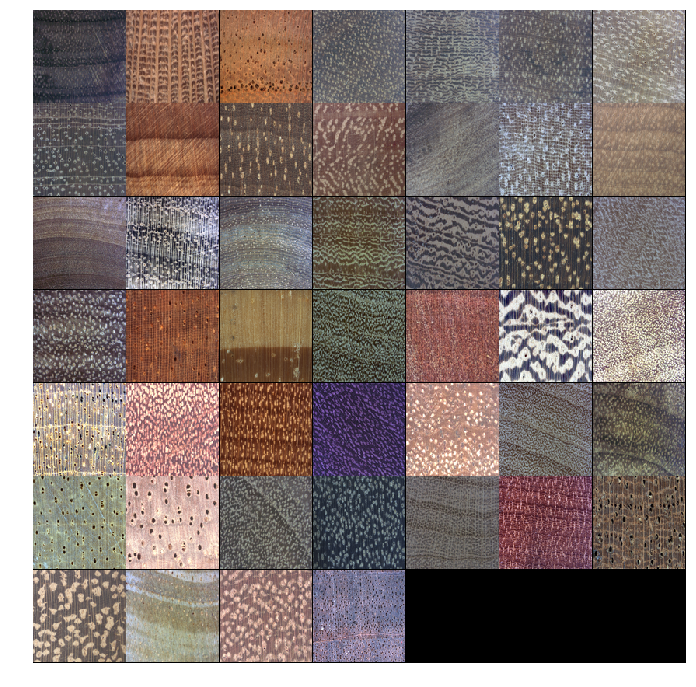

In [20]:
from PIL import Image

def create_montage(imgs, thumbnail_width, thumbnail_height):  
        
    no_images_row = int(np.ceil(np.sqrt(len(imgs))))
    
    size = (thumbnail_height, thumbnail_width)
    pixel_width = no_images_row*(thumbnail_width)
    pixel_height = no_images_row*(thumbnail_height)
    new_im = Image.new('RGB', (pixel_height, pixel_width))
    
    complete = False
    idx = 0

    for i in range(0, pixel_width, thumbnail_width):
        for j in range(0, pixel_height, thumbnail_height):
            if idx==len(imgs):
                complete = True
                break
            try:
                im = Image.open(imgs[idx])
            except IOError:
                print("failed")
                idx+=1
            im = Image.open(imgs[idx]).resize((thumbnail_width-1, thumbnail_height-1), Image.ANTIALIAS)

            new_im.paste(im, (j,i))
            idx+=1    
        if complete:
            break
    return new_im

im = create_montage(images, 120, 120)
plt.figure(figsize=(12,12))
plt.imshow(im)
plt.axis('off')
plt.show()